# Patrones de Viajes - Análisis por Zuber Company

En el siguiente proyecto se analiza la preferencia de los pasajeros al viajar. Así mismo cómo afectan factores externos como el clima sobre el tiempo de los viajes. Adicionalmente se realizará una prueba de hipótesis para comprobar el cambio de duración de viaje cuando el clima es malo. Es importante mencionar que los datos utilizados en este documento se obtuvieron previamente mediante la herramienta de consulta SQL. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INICIALIZACIÓN" data-toc-modified-id="INICIALIZACIÓN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INICIALIZACIÓN</a></span></li><li><span><a href="#CARGA-DE-DATOS" data-toc-modified-id="CARGA-DE-DATOS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CARGA DE DATOS</a></span></li><li><span><a href="#EXPLORACIÓN-DE-DATOS-INICIALES" data-toc-modified-id="EXPLORACIÓN-DE-DATOS-INICIALES-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EXPLORACIÓN DE DATOS INICIALES</a></span><ul class="toc-item"><li><span><a href="#Tabla-1:-Número-de-viajes-de-cada-compañía-de-taxis" data-toc-modified-id="Tabla-1:-Número-de-viajes-de-cada-compañía-de-taxis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tabla 1: Número de viajes de cada compañía de taxis</a></span></li><li><span><a href="#Tabla-2:-Lugar-de-finalización-de-los-viajes-de-taxistas" data-toc-modified-id="Tabla-2:-Lugar-de-finalización-de-los-viajes-de-taxistas-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tabla 2: Lugar de finalización de los viajes de taxistas</a></span></li><li><span><a href="#Tabla-3:-Condiciones-climáticas-durante-viajes-desde-el-Loop-hasta-el-Aeropuerto-Internacional-O'Hare" data-toc-modified-id="Tabla-3:-Condiciones-climáticas-durante-viajes-desde-el-Loop-hasta-el-Aeropuerto-Internacional-O'Hare-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Tabla 3: Condiciones climáticas durante viajes desde el Loop hasta el Aeropuerto Internacional O'Hare</a></span></li></ul></li><li><span><a href="#TRATAMIENTO-DE-DATOS" data-toc-modified-id="TRATAMIENTO-DE-DATOS-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>TRATAMIENTO DE DATOS</a></span></li><li><span><a href="#PRUEBA-DE-HIPÓTESIS" data-toc-modified-id="PRUEBA-DE-HIPÓTESIS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>PRUEBA DE HIPÓTESIS</a></span><ul class="toc-item"><li><span><a href="#Prueba-de-hipótesis-diferencia-de-medias-poblacionales" data-toc-modified-id="Prueba-de-hipótesis-diferencia-de-medias-poblacionales-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Prueba de hipótesis diferencia de medias poblacionales</a></span></li><li><span><a href="#Prueba-de-Hipótesis-relativa-a-dos-varianzas-de-poblaciones-normales" data-toc-modified-id="Prueba-de-Hipótesis-relativa-a-dos-varianzas-de-poblaciones-normales-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Prueba de Hipótesis relativa a dos varianzas de poblaciones normales</a></span></li></ul></li><li><span><a href="#CONCLUSIONES" data-toc-modified-id="CONCLUSIONES-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>CONCLUSIONES</a></span></li></ul></div>

## INICIALIZACIÓN

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats as st


## CARGA DE DATOS

In [2]:
url1 = 'https://raw.githubusercontent.com/doalpinc98/share_trips/main/company_name_trips.csv'
url2 = 'https://raw.githubusercontent.com/doalpinc98/share_trips/main/dropoff_location_trips.csv'
url3 = 'https://raw.githubusercontent.com/doalpinc98/share_trips/main/trips_from_loop_to_ohare.csv'
company_name_trips = pd.read_csv(url1)
dropoff_location_trips = pd.read_csv(url2)
trips_from_loop_to_ohare = pd.read_csv(url3)

## EXPLORACIÓN DE DATOS INICIALES

### Tabla 1: Número de viajes de cada compañía de taxis 

In [3]:
company_name_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
company_name_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


company_name: nombre de la empresa de taxis <br>
trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 


In [5]:
100*company_name_trips.isna().sum()/company_name_trips.shape[0]

company_name    0.0
trips_amount    0.0
dtype: float64

In [6]:
company_name_trips.duplicated().sum()

0

### Tabla 2: Lugar de finalización de los viajes de taxistas

In [7]:
dropoff_location_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
dropoff_location_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


dropoff_location_name: barrios de Chicago donde finalizaron los viajes <br>
average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.


In [9]:
100*dropoff_location_trips.isna().sum()/dropoff_location_trips.shape[0]

dropoff_location_name    0.0
average_trips            0.0
dtype: float64

In [10]:
dropoff_location_trips.duplicated().sum()

0

### Tabla 3: Condiciones climáticas durante viajes desde el Loop hasta el Aeropuerto Internacional O'Hare

In [11]:
trips_from_loop_to_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [12]:
trips_from_loop_to_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


•start_ts: fecha y hora de la recogida <br>
•weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje  <br>
•duration_seconds: duración del viaje en segundos


In [13]:
100*trips_from_loop_to_ohare.isna().sum()/trips_from_loop_to_ohare.shape[0]

start_ts              0.0
weather_conditions    0.0
duration_seconds      0.0
dtype: float64

In [14]:
trips_from_loop_to_ohare.duplicated().sum()

197

In [15]:
trips_from_loop_to_ohare = trips_from_loop_to_ohare.drop_duplicates().reset_index(drop
= True)

In [16]:
trips_from_loop_to_ohare.duplicated().sum()

0

## TRATAMIENTO DE DATOS

In [17]:
#•	importar los archivos
#•	estudiar los datos que contienen
#•	asegurarte de que los tipos de datos sean correctos
#•	identificar los 10 principales barrios en términos de finalización
#•	hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
#•	sacar conclusiones basadas en cada gráfico y explicar los resultados


In [18]:
data = dropoff_location_trips.head(10).sort_values(by ='average_trips', ascending = False)

In [19]:
data

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


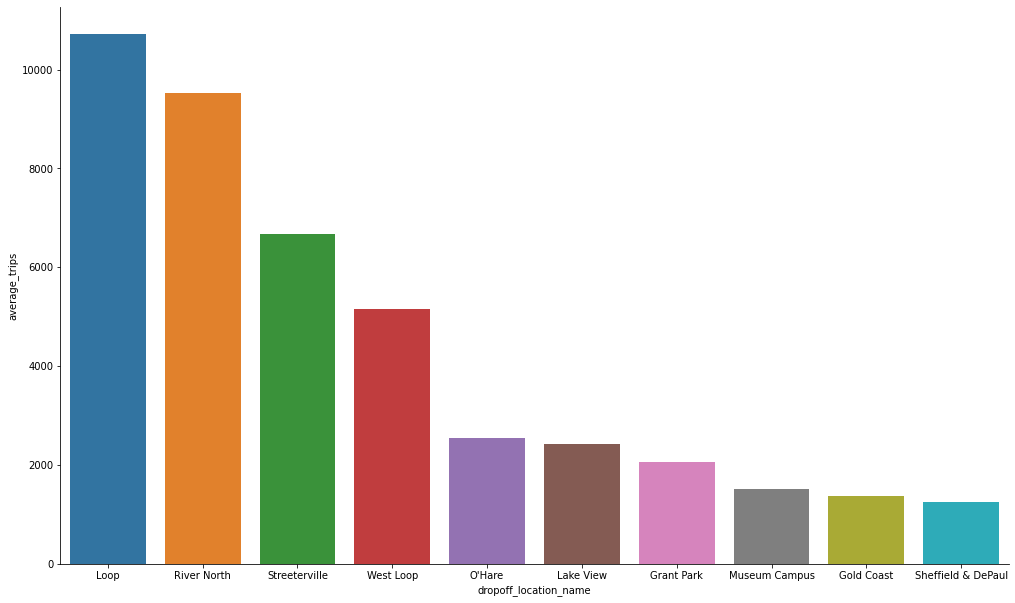

In [20]:
sns.catplot(data=data , x="dropoff_location_name", y="average_trips", kind="bar", height=8.27, aspect=14/8.27)

plt.show() 

In [21]:
data2 = company_name_trips.head(10).sort_values(by ='trips_amount', ascending = False)

In [22]:
data2

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


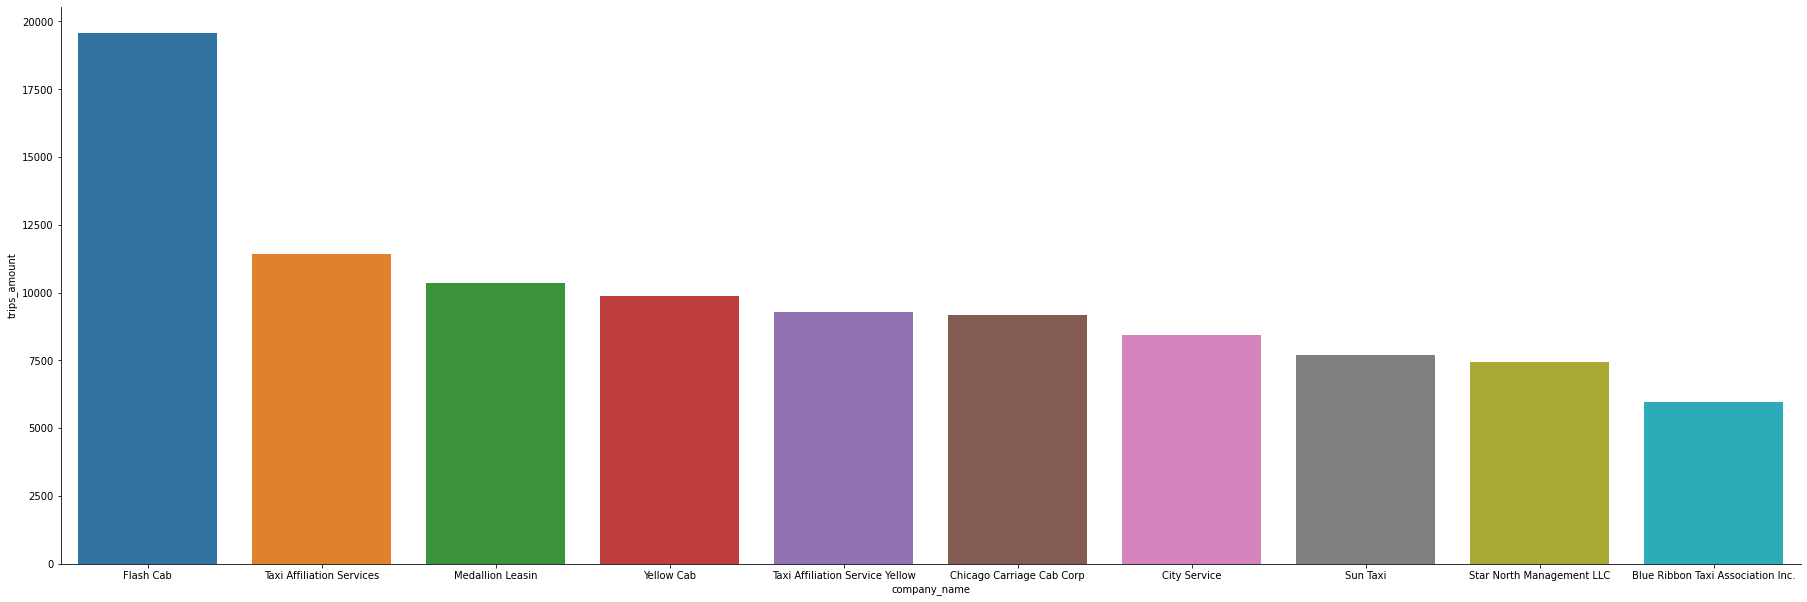

In [23]:
sns.catplot(data=data2 , x="company_name", y="trips_amount", kind="bar",  height=8.27, aspect=25/8.27)
plt.show() 


Conclusiones basado en los gráficos:
1. Los 10 barrios principales por número de finalizaciones son: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast and Sheffield & DePaul.
2.Las compañias de taxi con mayor número de viajes son: Flash Cab, Taxi Affiliation Services, Medallion Leasin, Yelow Cab, Taxi Afiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC, Blue Ribbon Taxi Association Inc.

## PRUEBA DE HIPÓTESIS

### Prueba de hipótesis diferencia de medias poblacionales

H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos".<br>
H1: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
   

In [24]:
trips_from_loop_to_ohare['start_ts'] = pd.to_datetime(trips_from_loop_to_ohare['start_ts'], format='%Y-%m-%dT%H:%M:%S')
trips_from_loop_to_ohare['day_of_week']= pd.DatetimeIndex(trips_from_loop_to_ohare['start_ts']).weekday

In [25]:
trips_from_loop_to_ohare.head(5)

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5


In [27]:
group1 = trips_from_loop_to_ohare.loc[trips_from_loop_to_ohare['weather_conditions']=='Good']
group2 = trips_from_loop_to_ohare.loc[trips_from_loop_to_ohare['weather_conditions']=='Bad']

In [28]:
group1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 869
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            723 non-null    datetime64[ns]
 1   weather_conditions  723 non-null    object        
 2   duration_seconds    723 non-null    float64       
 3   day_of_week         723 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 28.2+ KB


In [34]:
group1.describe()

,duration_seconds,day_of_week
count,723.000000,723.0
mean,2032.253112,5.0
std,773.444860,0.0
min,0.000000,5.0
25%,1435.500000,5.0
50%,1883.000000,5.0
75%,2491.500000,5.0
max,7440.000000,5.0


In [29]:
group2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 6 to 870
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            148 non-null    datetime64[ns]
 1   weather_conditions  148 non-null    object        
 2   duration_seconds    148 non-null    float64       
 3   day_of_week         148 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.8+ KB


In [35]:
group2.describe()

,duration_seconds,day_of_week
count,148.000000,148.0
mean,2409.229730,5.0
std,751.544705,0.0
min,480.000000,5.0
25%,1746.000000,5.0
50%,2463.500000,5.0
75%,2940.000000,5.0
max,4980.000000,5.0


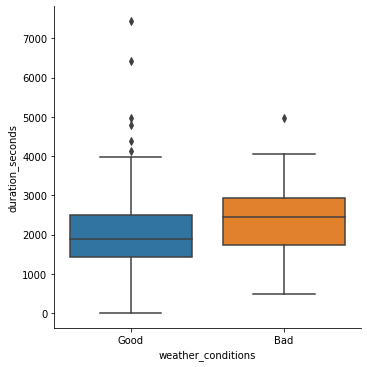

In [26]:
sns.catplot(data=trips_from_loop_to_ohare, x="weather_conditions", y="duration_seconds", kind="box")

En el diagrama de cajas se observa que dependiendo de las condiciones climáticas el tiempo que toma el viaje entre Loop y O'Hare cambia de entre 2032 segundos en clima Good a 2409.

In [32]:
p1 = group1['duration_seconds'].head(148)
p2 = group2['duration_seconds']

In [33]:
alpha = 0.05  # el nivel de significancia estadística crítica

results = st.ttest_rel(p1, p2)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  2.3350531826777704e-07
Rechazamos la hipótesis nula


Se puede concluir que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. Es decir el tiempo para llegar no es el mismo cuando el clima es bueno a cuando el clima es categorizado como malo. 

### Prueba de Hipótesis relativa a dos varianzas de poblaciones normales

H0: σ12 = σ22 <br>
    H1: σ12 ≠ σ22
    

Para la comparación de las varianzas se toma la varianza con mayor valor como numerador y se la divide a la varianza del grupo con el cual se está comparando. 

In [45]:
var_1 = np.var(group1['duration_seconds'])
var_2 = np.var(group2['duration_seconds'])
var_max= max(var_1,var_2)
var_min= min(var_1,var_2)

In [46]:
Estadistico_F = var_max/var_min
Estadistico_F

1.064859616886626

Cuando el valor del estadístico F (Fisher) es cercano a uno, se concluye que no existe suficiente evidencia estadística para rechazar la hipótesis nula. Por tanto, la varianza del tiempo de duración de viaje cuando el clima es bueno y malo no tiene diferencia significativa. 

## CONCLUSIONES

Podemos concluir que la duración de viaje cuando el clima es bueno y la duración de viaje cuando el clima es malo tiene la misma dispersión pero diferentes medias. La teoría del mejoramiento en calidad busca la disminución de la variabilidad (dispersión).